`Максим Мицкевич`

## 1. Постановка задачи

Вам предстоит решить настоящую задачу машинного обучения, направленную на автоматизацию бизнес процессов. Мы построим модель, которая будет предсказывать общую продолжительность поездки такси в Нью-Йорке. 

**Бизнес-задача:** определить характеристики и с их помощью спрогнозировать длительность поездки такси.

**Техническая задача для вас как для специалиста в Data Science:** построить модель машинного обучения, которая на основе предложенных характеристик клиента будет предсказывать числовой признак - время поездки такси. То есть решить задачу регрессии.

**Основные цели задания:**
1. Сформировать набор данных на основе нескольких источников информации
2. Спроектировать новые признаки с помощью Feature Engineering и выявить наиболее значимые при построении модели
3. Исследовать предоставленные данные и выявить закономерности
4. Построить несколько моделей и выбрать из них наилучшую по заданной метрике
5. Спроектировать процесс предсказания времени длительности поездки для новых данных


## 2. Знакомство с данными, базовый анализ и расширение данных (10 баллов)

Начнём наше исследование со знакомства с предоставленными данными. А также подгрузим дополнительные источники данных и расширим наш исходный датасет. 


Заранее импортируем модули, которые нам понадобятся для решения задачи:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy import stats
from sklearn import linear_model
from sklearn import preprocessing
from sklearn import model_selection
from sklearn import tree
from sklearn import ensemble
from sklearn import metrics
from sklearn import cluster
from sklearn import feature_selection
from statsmodels.formula.api import ols
from sklearn.linear_model import LinearRegression
sns.set_theme()
np.random.seed(42)

Прочитаем наш файл с исходными данными:

In [2]:
taxi_data = pd.read_csv("train.csv")
print('Train data shape: {}'.format(taxi_data.shape))
taxi_data.head()

Train data shape: (1458644, 11)


,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


Итак, у нас с вами есть данные о почти 1.5 миллионах поездок и 11 характеристиках, которые описывают каждую из поездок. 

Мы условно разделили признаки нескольких групп. 


**Данные о клиенте и таксопарке:**
* id - уникальный идентификатор поездки
* vendor_id - уникальный идентификатор поставщика (таксопарка), связанного с записью поездки

**Временные характеристики:**
* pickup_datetime - дата и время, когда был включен счетчик поездки
* dropoff_datetime - дата и время, когда счетчик был отключен

**Географическая информация:**
* pickup_longitude -  долгота, на которой был включен счетчик
* pickup_latitude - широта, на которой был включен счетчик
* dropoff_longitude - долгота, на которой счетчик был отключен
* dropoff_latitude - широта, на которой счетчик был отключен

**Прочие признаки:**
* passenger_count - количество пассажиров в транспортном средстве (введенное водителем значение)
* store_and_fwd_flag - флаг, который указывает, сохранилась ли запись о поездке в памяти транспортного средства перед отправкой поставщику. Y - хранить и пересылать, N - не хранить и не пересылать поездку.

**Целевой признак:**
* trip_duration - продолжительность поездки в секундах


Для начала мы проведем базовый анализ того, насколько данные готовы к дальнейшей предобработке и анализу. 

### Задание 2.1 (1 балл)
Для начала посмотрим на временные рамки, в которых мы работаем с данными.

Переведите признак pickup_datetime в тип данных datetime с форматом год-месяц-день час:минута:секунда (в функции pd.to_datetime() параметр format='%Y-%m-%d %H:%M:%S'). 

Определите временные рамки (без учета времени), за которые представлены данные.

In [3]:
taxi_data['pickup_datetime'] = pd.to_datetime(taxi_data['pickup_datetime'], format='%Y-%m-%d %H:%M:%S')

In [4]:
print(taxi_data['pickup_datetime'].min()) #Минимальное значение
print(taxi_data['pickup_datetime'].max()) #Максимальное значение

2016-01-01 00:00:17
2016-06-30 23:59:39


`Комментарий:` Мы можем видеть, что данные представлены за полгода

### Задание 2.2 (1 балл)
Посмотрим на пропуски. 
Сколько пропущенных значений присутствует в данных (суммарно по всем столбцам таблицы)?

In [5]:
taxi_data.isna().sum().sum() #Пропуски отсутствуют

0

### Задание 2.3 (1 балл)
Посмотрим на статистические характеристики некоторых признаков. 

а) Сколько уникальных таксопарков присутствует в данных?

б) Каково максимальное количество пассажиров?

в) Чему равна средняя и медианная длительность поездки? Ответ приведите в секундах и округлите до целого.

г) Чему равно минимальное и максимальное время поездки (в секундах)?


In [6]:
taxi_data['vendor_id'].unique()

array([2, 1])

a) В данных представлено два таксопарка. Закодированные как "2" и "1" соответственно

In [7]:
taxi_data['passenger_count'].max() #Максимальное количество пассажиров

9

In [8]:
round(taxi_data['trip_duration'].mean()) #средняя продолжительность поездки

959

In [9]:
round(taxi_data['trip_duration'].median()) #медианная продолжительность поездки

662

In [10]:
(taxi_data['trip_duration'].min(),taxi_data['trip_duration'].max()) 

(1, 3526282)

г) Минимальное время поездки равно одной секунде. Максимальное время поездки равняется 3526282 секундам

### Задание 2.4 (2 балла)
Реализуйте функцию add_datetime_features(), которая принимает на вход таблицу с данными о поездках (DataFrame) и возвращает ту же таблицу с добавленными в нее 3 столбцами:
* pickup_date - дата включения счетчика - начала поездки (без времени);
* pickup_hour - час дня включения счетчика;
* pickup_day_of_week - наименование дня недели, в который был включен счетчик.

Добавьте эти три столбца.

а) Сколько поездок было совершено в субботу?

б) Сколько поездок в среднем совершается в день? 

In [11]:
def add_datetime_features(df):
    df['pickup_date'] = df['pickup_datetime'].dt.date
    df['pickup_hour'] = df['pickup_datetime'].dt.hour
    df['pickup_day_of_week'] = df['pickup_datetime'].dt.day_name('en_US')
    return df
taxi_data = add_datetime_features(taxi_data)

In [12]:
taxi_data[taxi_data['pickup_day_of_week'] == 'Saturday'].shape[0] #Количество поездок в субботу

220868

In [13]:
mean_day = taxi_data.groupby('pickup_date')['id'].count().mean()

In [14]:
print(f'В среднем количество поездок в день равняется: {mean_day}') 

В среднем количество поездок в день равняется: 8014.527472527472


### Задание 2.5 (2.5 балла)

Теперь, когда мы разобрались с временными характеристиками, переходим к географическим.

В данных есть столбцы, содержащие информацию о широте и долготе. Из них можно извлечь очень много полезной информации.

Например, зная широту и долготу начальной и конечной точек маршрута, мы можем воспользоваться OSRM API.

OSRM (Open Source Routing Machine) — это открытый бесплатный ресурс, который активно используется во многих сервисах, предполагающих построение кратчайшего маршрута. Он позволяет построить оптимальный кусочно-линейный путь из точки А в точку B, а также узнать его примерную длительность и длину. 

Проблема заключается в том, что, так как в наших данных содержится информация о более чем одном миллионе поездок, подгрузка данных с помощью API и их предобработка может занять несколько часов, а при слабом интернет-соединении — и дней. Поэтому мы заранее подготовили выгрузку данных из OSRM API для каждой поездки из выборки нашего набора данных.

Файлы с данными из OSRM для поездок из тренировочной таблицы вы можете найти во втором файле. Наборы данных представлены в табличном формате CSV. Нас будут интересовать только следующие столбцы:

* id — идентификатор поездки;
* total_distance — кратчайшее дорожное расстояние (в метрах) из точки, в которой был включён счётчик, до точки, в которой счётчик был выключен (согласно OSRM);
* total_travel_time — наименьшее время поездки (в секундах) из точки, в которой был включён счётчик, до точки, в которой счётчик был выключен (согласно OSRM);
* number_of_steps — количество дискретных шагов, которые должен выполнить водитель (поворот налево/поворот направо/ехать прямо и т. д.).

Реализуйте функцию add_osrm_features(), которая принимает на вход две таблицы:
* таблицу с данными о поездках;
* таблицу с данными из OSRM;

и возвращает обновленную таблицу с данными о поездках с добавленными в нее 3 столбцами:
* total_distance;
* total_travel_time;
* number_of_steps.

а) Чему равна разница (в секундах) между медианной длительностью поездки в данных и медианной длительностью поездки, полученной из OSRM? 

В результате объединения таблиц у вас должны были получиться пропуски в столбцах с информацией из OSRM API. Это связано с тем, что для некоторых поездок не удалось выгрузить данные из веб источника. 

б) Сколько пропусков содержится в столбцах с информацией из OSRM API после объединения таблиц?

In [15]:
osrm = pd.read_csv('osrm_data_train.csv')

In [16]:
def add_osrm_features(first, second):
    short_second = second[['id', 'total_distance', 'total_travel_time', 'number_of_steps']]
    first = first.merge(short_second, on = 'id', how = 'left', suffixes=('_left', '_right'))
    return first
taxi_data = add_osrm_features(taxi_data, osrm)

In [17]:
taxi_data['trip_duration'].median() - taxi_data['total_travel_time'].median()  #Разница в секундах
# Можно взять модуль, но он особо не нужен здесь

372.5

In [18]:
taxi_data.isna().sum().sum() #Мало, но можно выкинуть эти наблюдения :)

3

In [19]:
taxi_data = taxi_data.dropna() #Выкидываем наблюдения с NaN

### Задание 2.5 (2.5 балла)

В завершение первой части найдем очевидные выбросы в целевой переменной - длительности поездки. 

Проще всего найти слишком продолжительные поездки. Давайте условимся, что выбросами будут считаться поездки, длительность которых превышает 24 часа. 

Чуть сложнее с анализом поездок, длительность которых слишком мала. Потому что к ним относятся действительно реальные поездки на короткие расстояния, поездки, которые были отменены через секунду после того как включился счетчик, а также “телепортации” - перемещение на большие расстояния за считанные секунды. 
Условимся, что мы будем считать выбросами только последнюю группу. Как же нам их обнаружить наиболее простым способом?

Можно воспользоваться информацией о кратчайшем расстоянии, которое проезжает такси. Вычислить среднюю скорость автомобиля на кратчайшем пути следующим образом: 
$$avg\_speed= \frac{total\_distance}{1000*trip\_duration}*3600$$


Давайте условимся, что предельная средняя скорость, которую могут развивать таксисты будет 300 км/ч. 


Найдите поездки, длительность которых превышает 24 часа. И удалите их из набора данных.

а) Сколько выбросов по признаку длительности поездки вам удалось найти?

Найдите поездки, средняя скорость которых по кратчайшему пути превышает 300 км/ч и удалите их из данных. 

б) Сколько выбросов по признаку скорости вам удалось найти?

In [20]:
outliers_time = taxi_data[(taxi_data['trip_duration'] / 3600) > 24]
print(f'Количество выбросов по признаку длительности поездки: {outliers_time.shape[0]}')

Количество выбросов по признаку длительности поездки: 4


In [21]:
outliers_speed = taxi_data[((taxi_data['total_distance'] / (1000 * taxi_data['trip_duration'])) * 3600) > 300]
print(f'Количество выбросов по признаку скорости: {outliers_speed.shape[0]}')

Количество выбросов по признаку скорости: 406


In [22]:
#Удаляем признаки из данных
taxi_data = taxi_data.drop(outliers_time.index) 
taxi_data = taxi_data.drop(outliers_speed.index)

## 3. Разведывательный анализ данных (EDA) (6 баллов)

Начинаем с целевого признака. Забегая вперед, скажем, что основной метрикой качества решения поставленной задачи будет RMSLE - Root Mean Squared Log Error, которая вычисляется на основе целевой переменной в логарифмическом масштабе. В таком случае целесообразно сразу логарифмировать признак длительности поездки и рассматривать при анализе логарифм в качестве целевого признака:
$$trip\_duration\_log = log(trip\_duration+1),$$
где под символом log подразумевается натуральный логарифм.


In [23]:
taxi_data['trip_duration_log'] = np.log(taxi_data['trip_duration']+1)

### Задание 3.1. (2 балла)
Постройте две визуализации:
* Распределение количества поездок в зависимости от часа дня;
* Зависимость медианной длительности поездки от часа дня.

На основе построенных графиков ответьте на следующие вопросы:

а) В какое время суток такси заказывают реже всего?

б) В какое время суток наблюдается пик медианной длительности поездок?

<Axes: xlabel='pickup_hour', ylabel='Count'>

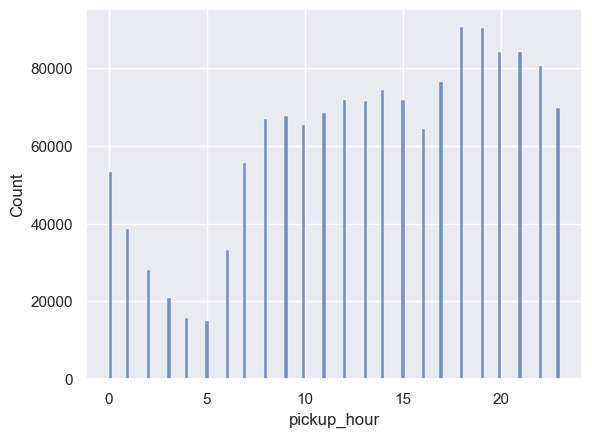

In [24]:
sns.histplot(taxi_data['pickup_hour'])

In [25]:
median_duration_per_hours = taxi_data.groupby('pickup_hour')['trip_duration'].median().to_frame().reset_index()

<Axes: xlabel='pickup_hour', ylabel='trip_duration'>

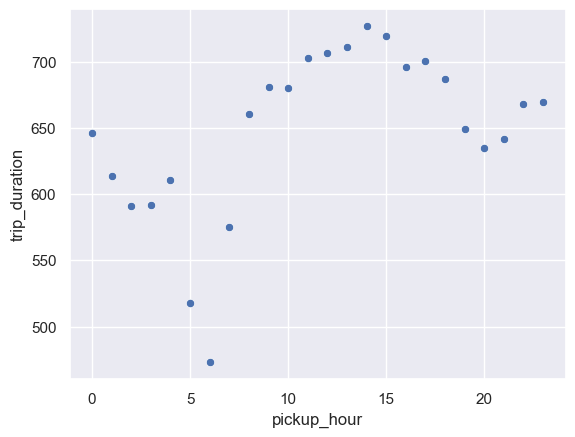

In [26]:
sns.scatterplot(data = median_duration_per_hours, x= 'pickup_hour', y = 'trip_duration')

`Ответы на вопросы`
1. Реже всего такси заказывают в ночное время с 1 часа ночи до 5 утра. Это обусловлено в целом тем, что такси заказывают люди. Обычно ночью люди спят
2. Пик медианной длительности поездки приходится на 13-15 часов дня. Это может быть связано как с тем, что это рабочее время, так и с тем, что обычно в дневное время наблюдаются пробки, которые могут увеличивать время поездки.

### Задание 3.2. (2 балла)
Постройте две визуализации:
* Распределение количества поездок в зависимости от дня недели;
*  Зависимость медианной длительности поездки от дня недели.

На основе построенных графиков ответьте на следующие вопросы:
а) В какой день недели совершается больше всего поездок?
б) В какой день недели медианная длительность поездок наименьшая?


<Axes: xlabel='pickup_day_of_week', ylabel='Count'>

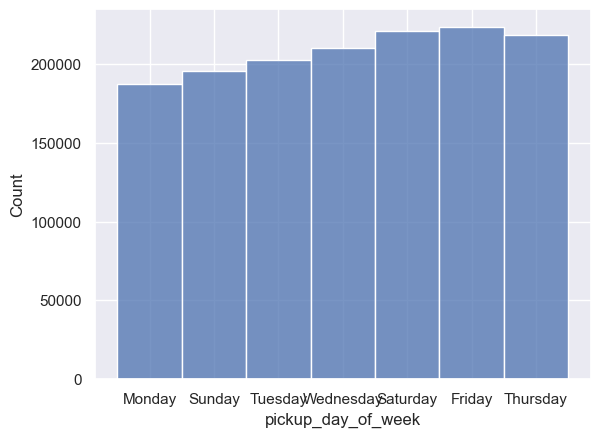

In [27]:
sns.histplot(taxi_data['pickup_day_of_week'])

In [28]:
taxi_data.groupby('pickup_day_of_week')['trip_duration'].median()

pickup_day_of_week
Friday       686.0
Monday       630.0
Saturday     637.0
Sunday       602.0
Thursday     710.0
Tuesday      679.0
Wednesday    694.0
Name: trip_duration, dtype: float64

In [29]:
median_duration_per_dayweeks = taxi_data.groupby('pickup_day_of_week')['trip_duration'].median().to_frame().reset_index()

<Axes: xlabel='pickup_day_of_week', ylabel='trip_duration'>

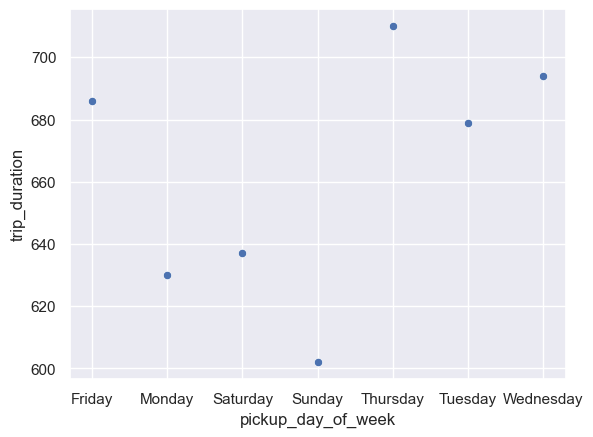

In [30]:
sns.scatterplot(data = median_duration_per_dayweeks, x = 'pickup_day_of_week', y = 'trip_duration')

`Ответы на вопросы`
1. В целом наблюдается достаточно равное распределение (не полностью), нет сильных различий. Большее количество поездок наблюдается в субботу, пятницу и четверг.
2. Наибольшая продолжительность наблюдается в четверг, вторник, среду и пятницу. Наименьшая продолжительность наблюдается в понедельник и в выходные дни (суббота, воскресенье). Это

### Задание 3.3. (2 балла)
Посмотрим на обе временные характеристики одновременно. 

Постройте сводную таблицу, по строкам которой отложены часы (pickup_hour), по столбцам - дни недели (pickup_day_of_week), а в ячейках - медианная длительность поездки (trip_duration). 

Визуализируйте полученную сводную таблицу с помощью тепловой карты

<Axes: xlabel='pickup_day_of_week', ylabel='pickup_hour'>

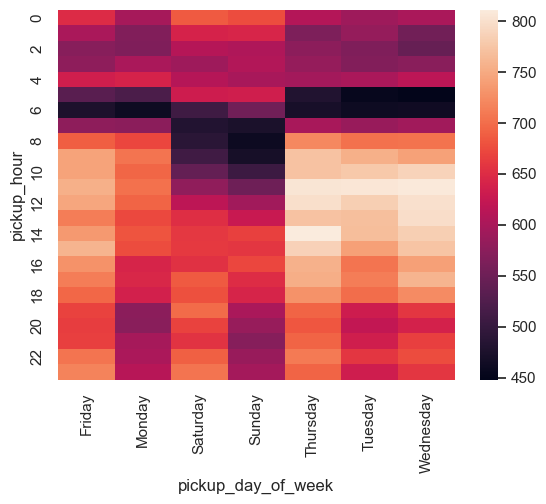

In [31]:
combined_table = taxi_data.groupby(['pickup_hour',
                                    'pickup_day_of_week'])['trip_duration'].median().to_frame().reset_index()
combined_table = combined_table.pivot(index = 'pickup_hour',
                                     columns = 'pickup_day_of_week', 
                                     values = 'trip_duration')
sns.heatmap(combined_table)

## 4. Отбор и преобразование признаков (4 балла)

Перед тем как перейти к построению модели, осталось сделать ещё несколько шагов.
* Следует помнить, что многие алгоритмы машинного обучения не могут обрабатывать категориальные признаки в их обычном виде. Поэтому нам необходимо их закодировать;
* Надо отобрать признаки, которые мы будем использовать для обучения модели;
*  Необходимо масштабировать и трансформировать некоторые признаки для того, чтобы улучшить сходимость моделей, в основе которых лежат численные методы.


### Задание 4.1. (1 балл)
Сразу позаботимся об очевидных неинформативных и избыточных признаках. 

а) Какой из признаков является уникальным для каждой поездки и не несет полезной информации в определении ее продолжительности?

б) Исключите выбранный признак из исходной таблицы с данными. 

`id` – является простым идентификатором поездки. Состоит из части "id" и сочетания цифр. Случайная комбинация букв и цифр не несет полезной информации (не имеет предсказательной способности), следовательно мы можем этот признак спокойно удалить

In [32]:
taxi_data = taxi_data.drop('id', axis = 1)

Ранее мы извлекли всю необходимую для нас информацию из даты начала поездки, теперь мы можем избавиться от этих признаков, так как они нам больше не понадобятся:


In [33]:
taxi_data

,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_date,pickup_hour,pickup_day_of_week,total_distance,total_travel_time,number_of_steps,trip_duration_log
0,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,2016-03-14,17,Monday,2009.1,164.9,5.0,6.122493
1,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663,2016-06-12,0,Sunday,2513.2,332.0,6.0,6.498282
2,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,2016-01-19,11,Tuesday,11060.8,767.6,16.0,7.661527
3,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429,2016-04-06,19,Wednesday,1779.4,235.8,4.0,6.063785
4,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435,2016-03-26,13,Saturday,1614.9,140.1,5.0,6.077642
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1458639,2,2016-04-08 13:31:04,2016-04-08 13:44:02,4,-73.982201,40.745522,-73.994911,40.740170,N,778,2016-04-08,13,Friday,2234.6,311.7,8.0,6.658011
1458640,1,2016-01-10 07:35:15,2016-01-10 07:46:10,1,-74.000946,40.747379,-73.970184,40.796547,N,655,2016-01-10,7,Sunday,7638.0,589.6,11.0,6.486161
1458641,2,2016-04-22 06:57:41,2016-04-22 07:10:25,1,-73.959129,40.768799,-74.004433,40.707371,N,764,2016-04-22,6,Friday,9871.5,642.9,10.0,6.639876
1458642,1,2016-01-05 15:56:26,2016-01-05 16:02:39,1,-73.982079,40.749062,-73.974632,40.757107,N,373,2016-01-05,15,Tuesday,1628.3,161.6,7.0,5.924256


In [34]:
drop_columns = ['pickup_datetime', 'pickup_date']
taxi_data = taxi_data.drop(drop_columns, axis=1)
print('Shape of data:  {}'.format(taxi_data.shape))

Shape of data:  (1458233, 15)


### Задание 4.2. (1.5 балла)
Закодируйте признак vendor_id в таблице train_data таким образом, чтобы он был равен 1, если идентификатор таксопарка равен 2, и 0 в противном случае.

Закодируйте признак store_and_fwd_flag в таблице train_data таким образом, чтобы он был равен 0, если флаг выставлен в значение "N", и 1 в противном случае.


In [35]:
taxi_data['vendor_id'] = taxi_data['vendor_id'].apply(lambda x: 1 if x == 2 else 0)
taxi_data['store_and_fwd_flag'] = taxi_data['store_and_fwd_flag'].apply(lambda x: 0 if x == 'N' else 1)

In [36]:
taxi_data['vendor_id'].value_counts()

1    780118
0    678115
Name: vendor_id, dtype: int64

In [37]:
taxi_data['store_and_fwd_flag'].value_counts()

0    1450192
1       8041
Name: store_and_fwd_flag, dtype: int64

### Задание 4.3. (1.5 балла)
Перекодируйте признак pickup_day_of_week с помощью OHE:

In [38]:
taxi_data_trans = pd.get_dummies(taxi_data,columns=['pickup_day_of_week'],
                                drop_first = True)
taxi_data_trans = taxi_data_trans.dropna()
taxi_data_trans.shape

(1458233, 20)

## 5. Решение задачи регрессии: линейная регрессия и деревья решений (10 баллов)

Определим метрику, по которой мы будем измерять качество наших моделей. Мы будем следовать канонам исходного соревнования на Kaggle и в качестве метрики использовать RMSLE (Root Mean Squared Log Error), которая вычисляется как:
$$RMSLE = \sqrt{\frac{1}{n}\sum_{i=1}^n(log(y_i+1)-log(\hat{y_i}+1))^2},$$
где:
* $y_i$ - истинная длительность i-ой поездки на такси (trip_duration)
* $\hat{y_i}$- предсказанная моделью длительность i-ой поездки на такси

Заметим, что логарифмирование целевого признака мы уже провели заранее, поэтому нам будет достаточно вычислить метрику RMSE для модели, обученной прогнозировать длительность поездки такси в логарифмическом масштабе:
$$z_i=log(y_i+1),$$
$$RMSLE = \sqrt{\frac{1}{n}\sum_{i=1}^n(z_i-\hat{z_i})^2}=\sqrt{MSE(z_i,\hat{z_i})}$$ 



### Задание 5.1. (2.5 балла)
Постройте модель линейной регрессии на обучающей выборке (факторы должны быть нормализованы, целевую переменную используйте в логарифмическом масштабе). Все параметры оставьте по умолчанию. Не забудьте разделить на тренировочную и тестовую выборки!

Для полученной модели рассчитайте метрику RMSLE на тренировочной и тестовой выборках. Ответ округлите до сотых.


In [115]:
y = taxi_data_trans['trip_duration_log']
X = taxi_data_trans.drop(['trip_duration', 'trip_duration_log', 'dropoff_datetime'], axis = 1)
#trip_duration зависима от логарифма себя, поэтому убираем

In [116]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y,
                                                                    test_size = 0.3, random_state= 42)

In [117]:
scaler = preprocessing.StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [118]:
lin_reg = linear_model.LinearRegression()
lin_reg.fit(X_train_scaled, y_train)
print(round(np.sqrt(metrics.mean_squared_error(lin_reg.predict(X_train_scaled), y_train)),2))
print(round(np.sqrt(metrics.mean_squared_error(lin_reg.predict(X_test_scaled), y_test)),2))

0.54
0.54


### Задание 5.2. (2.5 балла)
Постройте модель регрессии с L2-регуляризацией (регуляризация по Тихонову) на обучающей выборке  (факторы должны быть нормализованы, целевую переменную используйте в логарифмическом масштабе). Коэффициент регуляризации $\alpha$ установите равным 1, остальные параметры оставьте по умолчанию.

Для полученной модели рассчитайте метрику RMSLE на тренировочной и тестовой выборках. 

In [122]:
ridge = linear_model.Ridge(alpha = 1)
ridge.fit(X_train_scaled, y_train)
print(f'Значение RMSLE на обучающей выборке {np.sqrt(metrics.mean_squared_error(ridge.predict(X_train_scaled), y_train))}')
print(f'Значение RMSLE на тестовой выборке {np.sqrt(metrics.mean_squared_error(ridge.predict(X_test_scaled), y_test))}')

Значение RMSLE на обучающей выборке 0.5408690220821015
Значение RMSLE на тестовой выборке 0.5429884517308278


### Задание 5.3. (2.5 балла)
Постройте модель дерева решений (DecisionTreeRegressor) на обучающей выборке (факторы должны быть нормализованы, целевую переменную используйте в логарифмическом масштабе). Все параметры оставьте по умолчанию. 

а) Для полученной модели рассчитайте метрику RMSLE на тренировочной и тестовой выборках. Ответ округлите до сотых.

б) Наблюдаются ли у вашей модели признаки переобучения?


In [44]:
tree_reg = tree.DecisionTreeRegressor()
tree_reg.fit(X_train_scaled, y_train)
print(np.sqrt(metrics.mean_squared_error(tree_reg.predict(X_train_scaled), y_train)))
print(np.sqrt(metrics.mean_squared_error(tree_reg.predict(X_test_scaled), y_test)))

0.0034812228793972833
0.5747419691600143


Сверху значение на обучающей выборке, снизу на тестовой

In [123]:
print(round(np.sqrt(metrics.mean_squared_error(tree_reg.predict(X_train_scaled), y_train)),2))
print(round(np.sqrt(metrics.mean_squared_error(tree_reg.predict(X_test_scaled), y_test)),2))

0.0
0.57


`Ответ:` \
У данной модели мы можем явно заметить признаки переобучения, поскольку сильно отличается значение метрики на обучающей и тестовой выборках. На обучающей оно равняется практически нулю. 

### Задание 5.4. (2.5 балла)
Переберите все возможные варианты глубины дерева решений в диапазоне от 7 до 20:

max_depths = range(7, 20)


а) Найдите оптимальное значение максимальной глубины дерева, для которой будет наблюдаться минимальное значение RMSLE на обучающей выборке, но при этом еще не будет наблюдаться переобучение.

б) Чему равно значение метрик RMSLE на тренировочной и тестовой выборках для дерева решений с выбранной оптимальной глубиной?


In [47]:
def find_params(max_depth):
    model = tree.DecisionTreeRegressor(max_depth = max_depth, random_state = 42) 
    model.fit(X_train_scaled, y_train)
    output = (max_depth, np.sqrt(metrics.mean_squared_error(model.predict(X_train_scaled), y_train)),
             np.sqrt(metrics.mean_squared_error(model.predict(X_test_scaled), y_test)))
    return output

In [48]:
max_depths = range(7, 20)
new = [find_params(x) for x in max_depths]

In [49]:
trees = pd.DataFrame(np.array(new), columns = ['DEPTH', 'RMSE_TRAIN','RMSE_TEST'])
trees['DEPTH'] = trees['DEPTH'].astype(int)

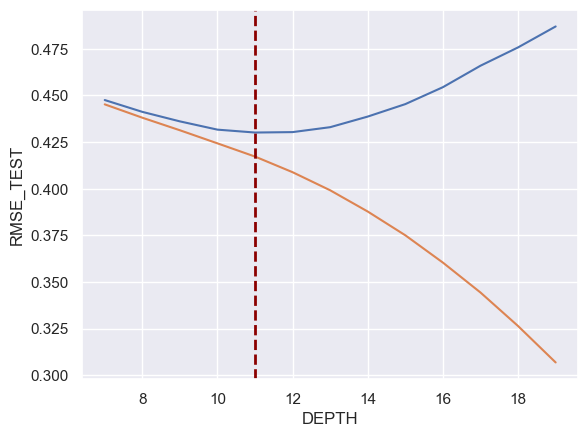

In [50]:
plot = sns.lineplot(trees, x = 'DEPTH', y = 'RMSE_TEST')
plot_2 = sns.lineplot(trees, x = 'DEPTH', y = 'RMSE_TRAIN')
plot.axvline(x=11, color='darkred', linestyle='--', linewidth=2)

In [71]:
trees.sort_values(by = 'RMSE_TEST')

,DEPTH,RMSE_TRAIN,RMSE_TEST
4,11,0.417224,0.430119
5,12,0.408834,0.430348
3,10,0.424314,0.431669
6,13,0.399141,0.432993
2,9,0.431338,0.436103
7,14,0.387739,0.438690
1,8,0.438072,0.441206
8,15,0.375002,0.445370
0,7,0.445236,0.447546
9,16,0.360352,0.454448


`Ответ` \
Оптимальная глубина: 11 \
Значение RMSLE на обучающей выборке: 0.417224 \
Значение RMSLE на тестовой выборке:  0.430119

## 6. Решение задачи регрессии: ансамблевые методы и построение прогноза (10 баллов)

Переходим к тяжелой артиллерии: ансамблевым алгоритмам. 

### Задание 6.1. (2.5 балла)

Постройте модель случайного леса на обучающей выборке (факторы должны быть нормализованы, целевую переменную используйте в логарифмическом масштабе). В качестве гиперпараметров укажите следующие:
* n_estimators=200,
* max_depth=12,
* criterion='squared_error',
* min_samples_split=20,
* random_state=42

Для полученной модели рассчитайте метрику RMSLE на тренировочной и тестовой выборках.


In [52]:
rf = ensemble.RandomForestRegressor(n_estimators = 200,
                                   max_depth=12,
                                   criterion='squared_error',
                                   min_samples_split=20,
                                   random_state=42)
rf.fit(X_train_scaled, y_train)

RandomForestRegressor(max_depth=12, min_samples_split=20, n_estimators=200,
                      random_state=42)

In [121]:
print(f'Значение на обучающей выборке: {np.sqrt(metrics.mean_squared_error(rf.predict(X_train_scaled), y_train))}')
print(f'Значение на тестовой выборке: {np.sqrt(metrics.mean_squared_error(rf.predict(X_test_scaled), y_test))}')

Значение на обучающей выборке: 0.40208301798693846
Значение на тестовой выборке: 0.4160738687481532


### Задание 6.2. (2.5 балла)
Постройте модель градиентного бустинга над деревьями решений (GradientBoostingRegressor) на обучающей выборке (факторы должны быть нормализованы, целевую переменную используйте в логарифмическом масштабе). В качестве гиперпараметров укажите следующие:
* learning_rate=0.5,
* n_estimators=100,
* max_depth=6, 
* min_samples_split=30,
* random_state=42

Для полученной модели рассчитайте метрику RMSLE на тренировочной и тестовой выборках.

In [54]:
boosting = ensemble.GradientBoostingRegressor(learning_rate = 0.5,
                                             n_estimators = 100,
                                             max_depth = 6,
                                             min_samples_split = 30,
                                             random_state = 42)
boosting.fit(X_train_scaled, y_train)

GradientBoostingRegressor(learning_rate=0.5, max_depth=6, min_samples_split=30,
                          random_state=42)

In [55]:
print(np.sqrt(metrics.mean_squared_error(boosting.predict(X_train_scaled), y_train)))
print(np.sqrt(metrics.mean_squared_error(boosting.predict(X_test_scaled), y_test)))

0.3813268983282008
0.3983441217294843


Сверху значение RMSLE на тренировочной, снизу на тестовой выборке

### Задание 6.3. (1.5 балла)
Постройте столбчатую диаграмму коэффициентов значимости каждого из факторов.

Укажите топ-3 наиболее значимых для предсказания целевого признака - длительности поездки.

In [103]:
np.printoptions(suppress = True)
names = X_train.columns
features = pd.DataFrame(np.column_stack([boosting.feature_importances_, X_train.columns]), 
                        columns = ['value', 'name'])

In [104]:
features.sort_values(by = 'value', ascending = False).head(3)['name'] 
#топ три наиболее значимых факторов

8       total_distance
9    total_travel_time
7          pickup_hour
Name: name, dtype: object

<Axes: xlabel='name', ylabel='value'>

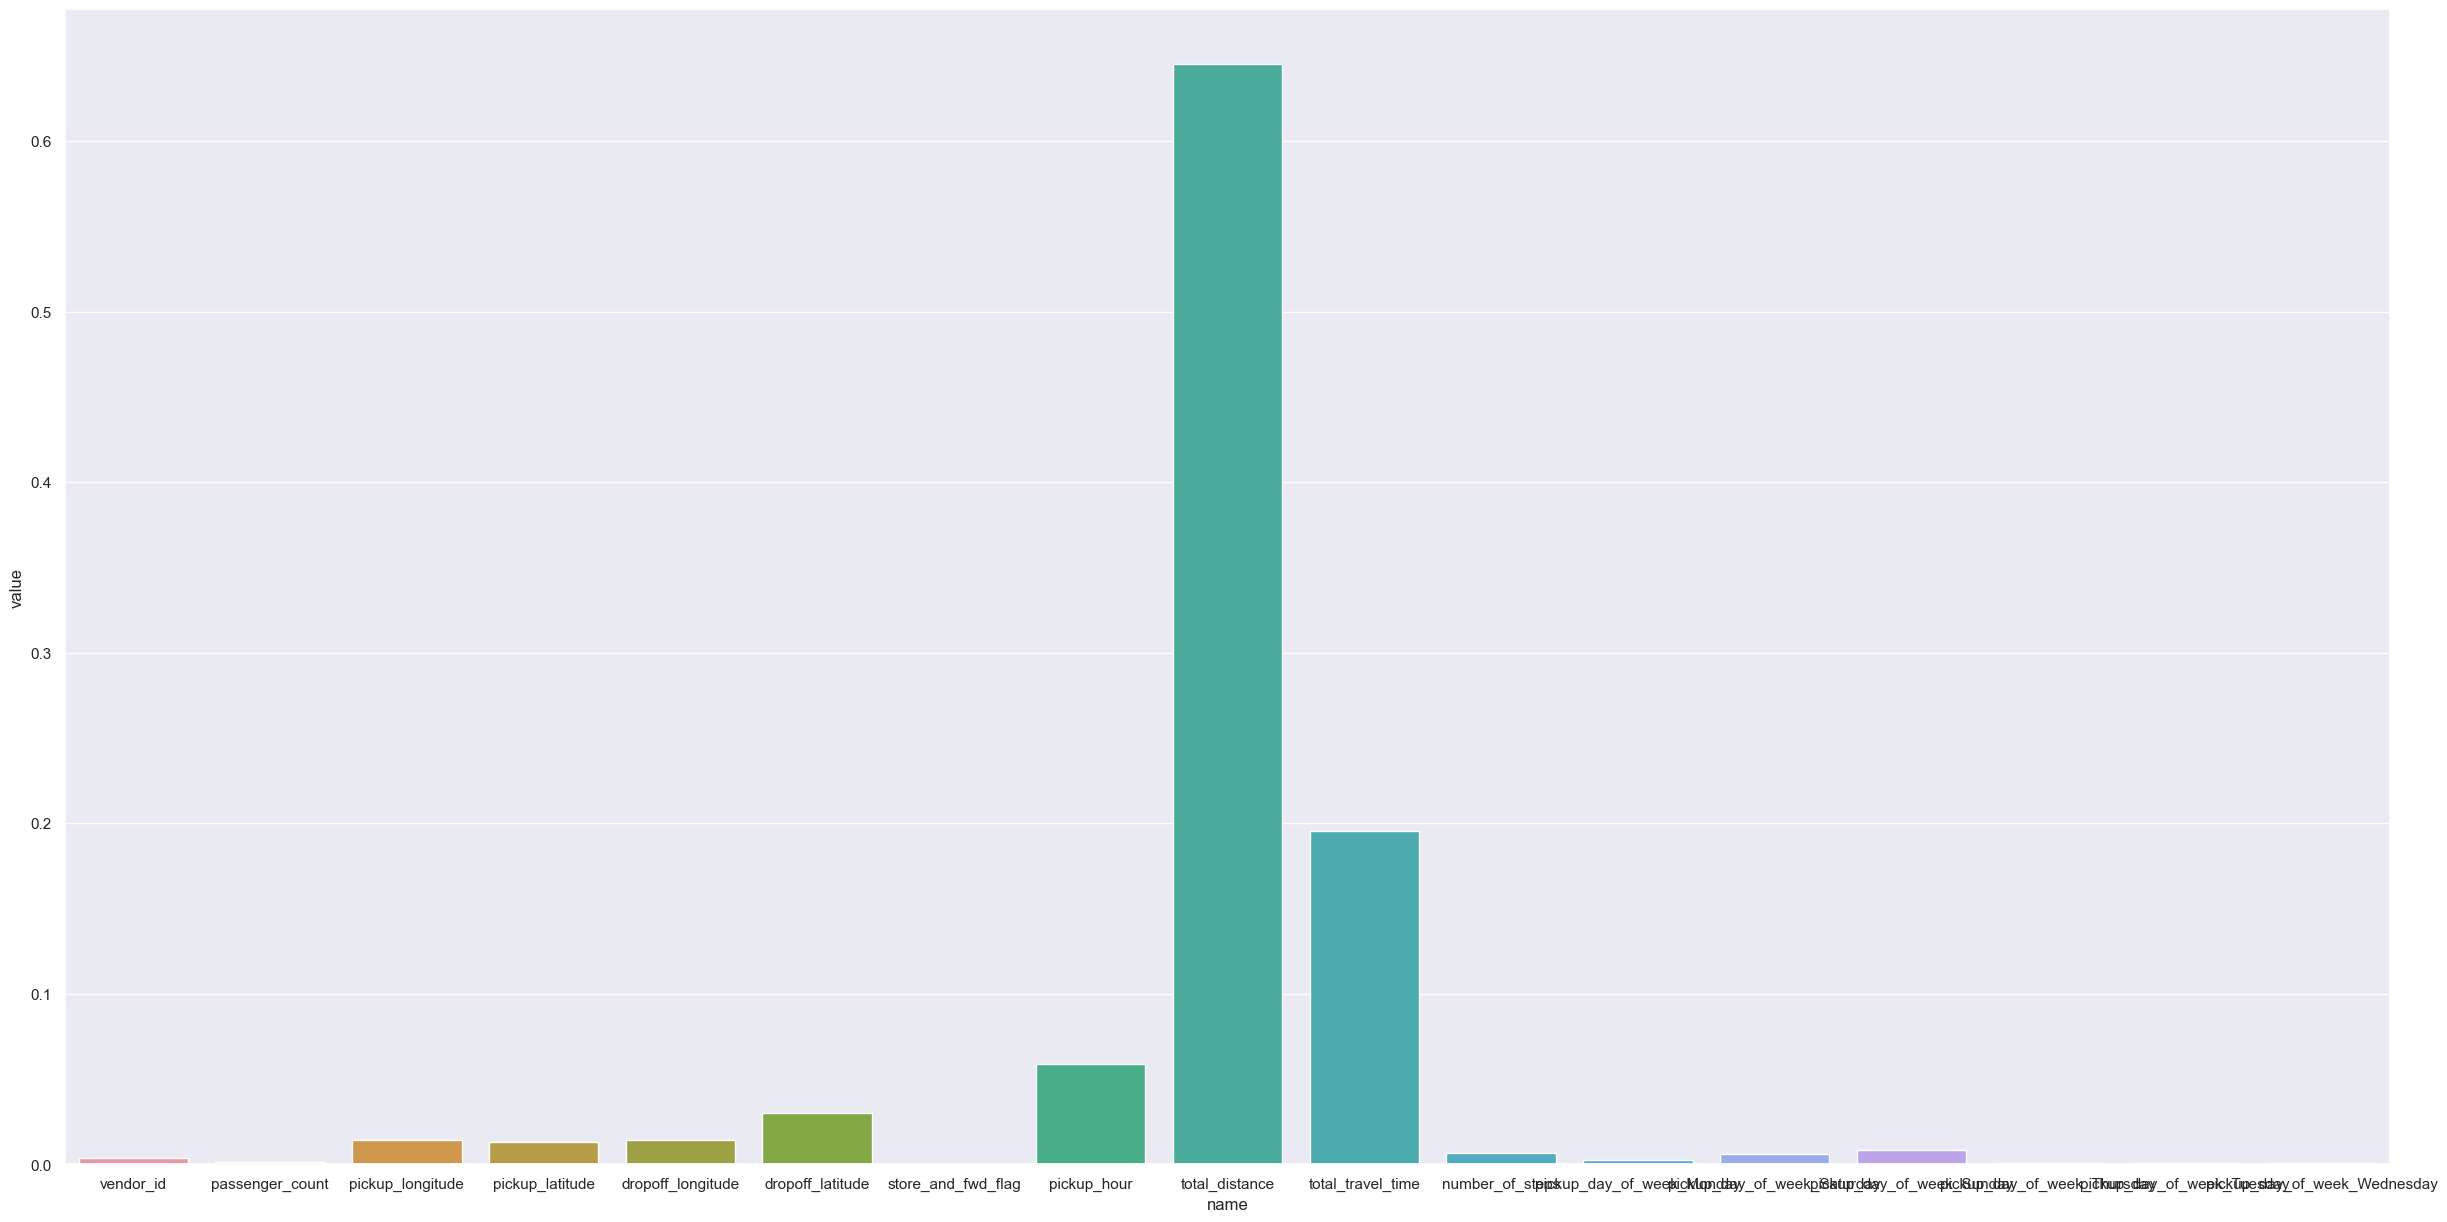

In [105]:
plt.figure(figsize=(30, 15))
sns.barplot(features, x = 'name', y = 'value')

Тремя наиболее важными признаками являются: `total_distance`, `total_travel_time`, `pickup_hour`

Ниже я вывожу важность факторов для случайного леса, а также для линейной регрессии (в виде модулей коэффициентов)

<Axes: xlabel='name', ylabel='value'>

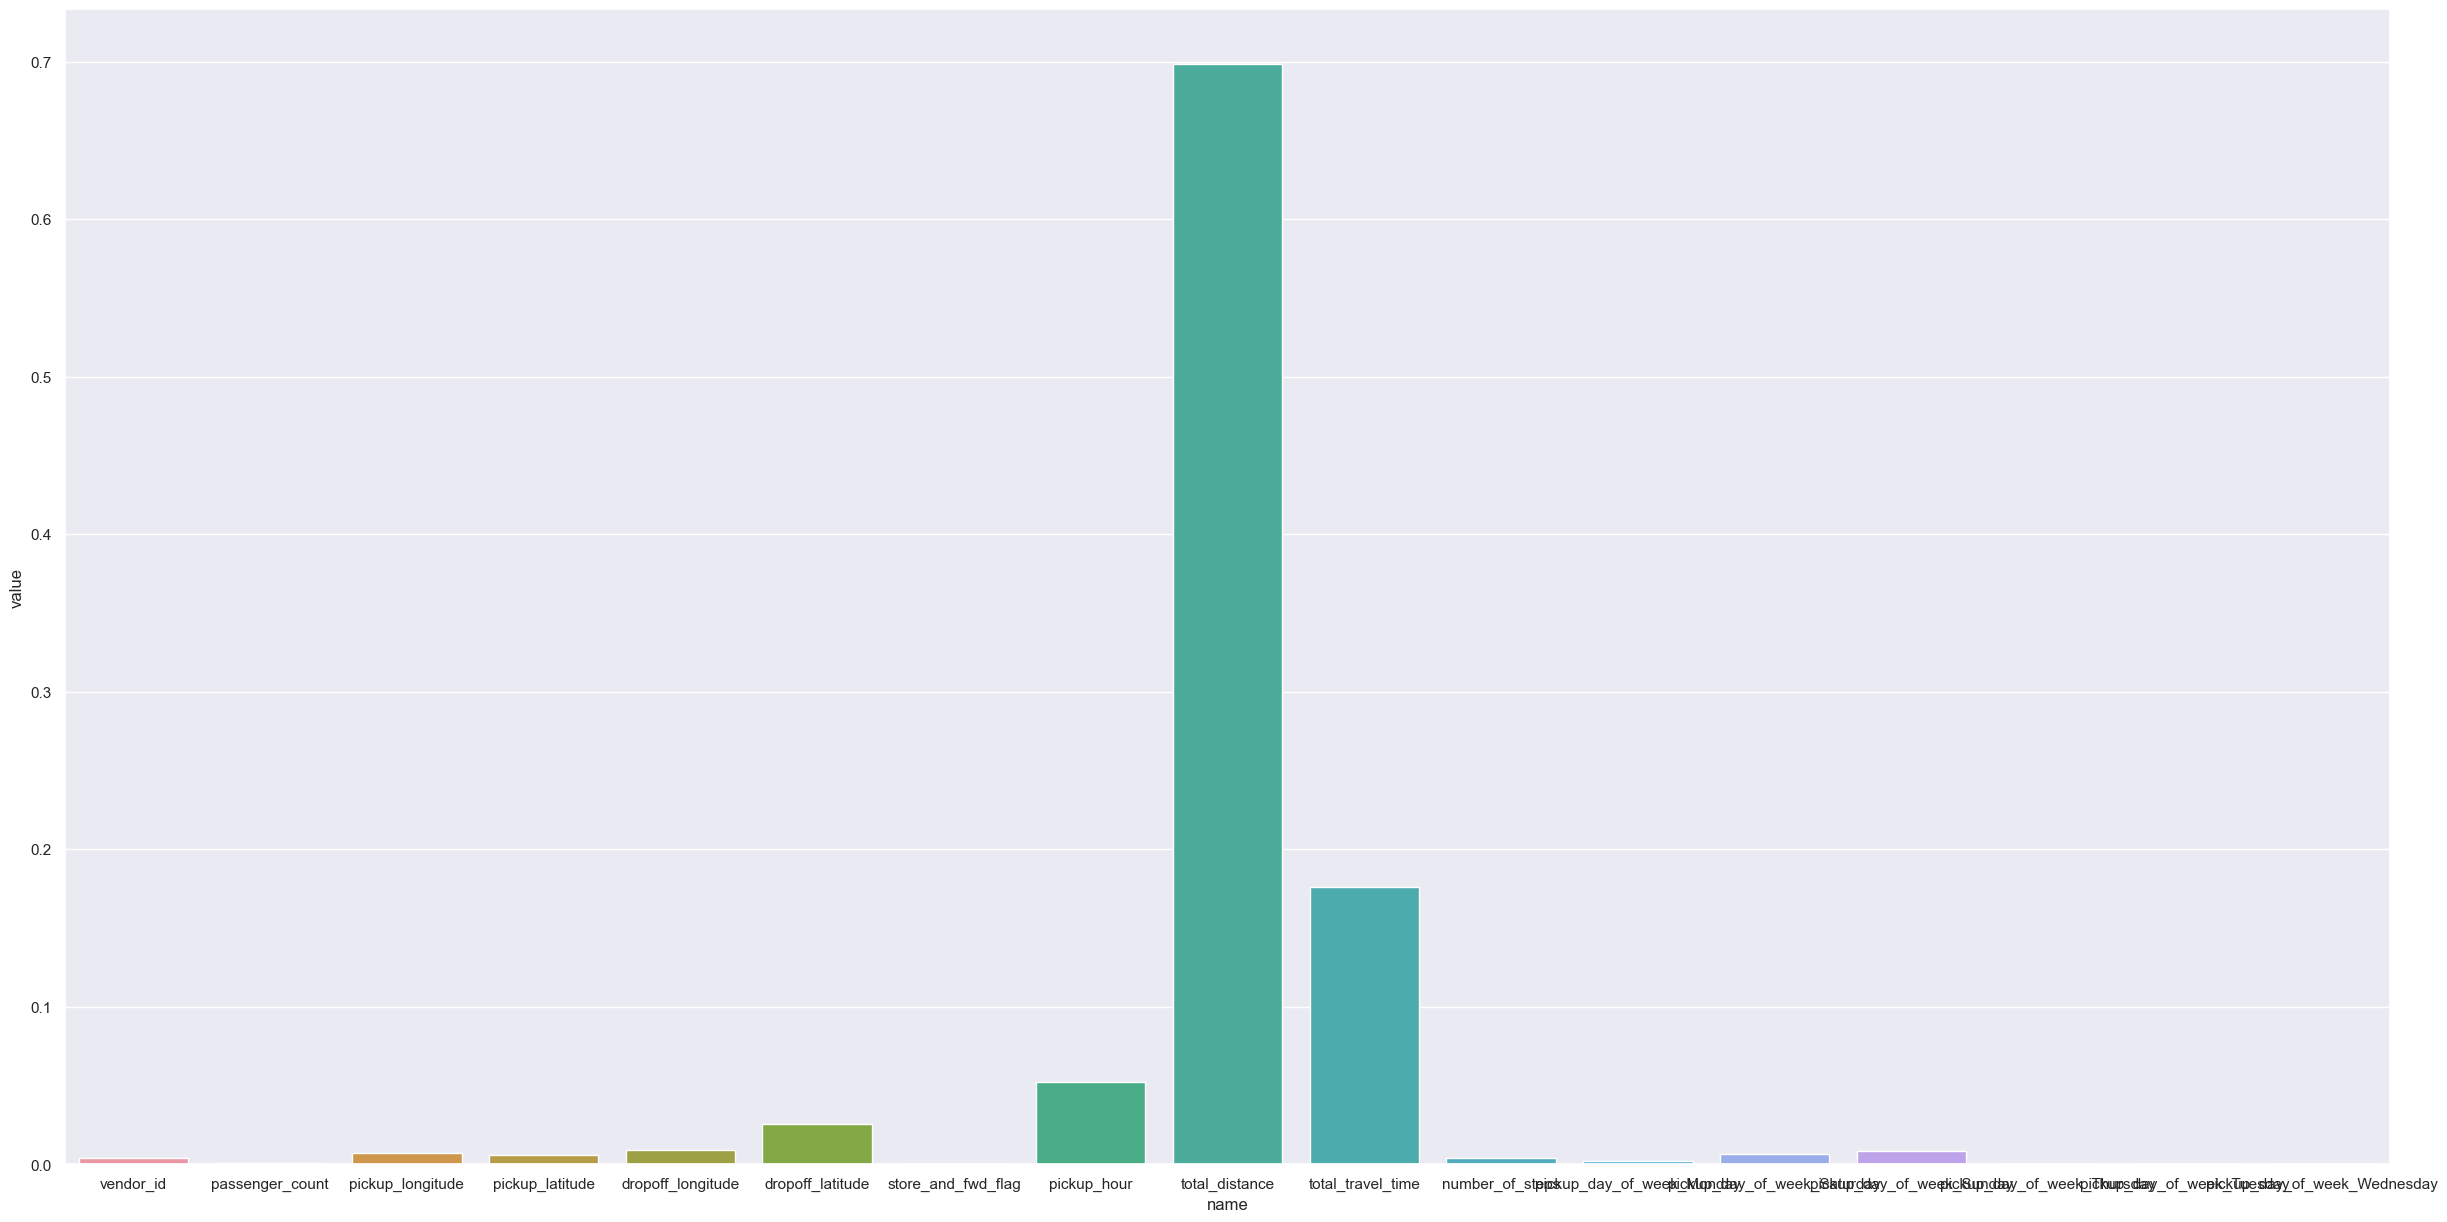

In [106]:
features_rf = pd.DataFrame(np.column_stack([rf.feature_importances_, X_train.columns]), 
                        columns = ['value', 'name'])
plt.figure(figsize=(30, 15))
sns.barplot(features_rf, x = 'name', y = 'value')

<Axes: xlabel='name', ylabel='value'>

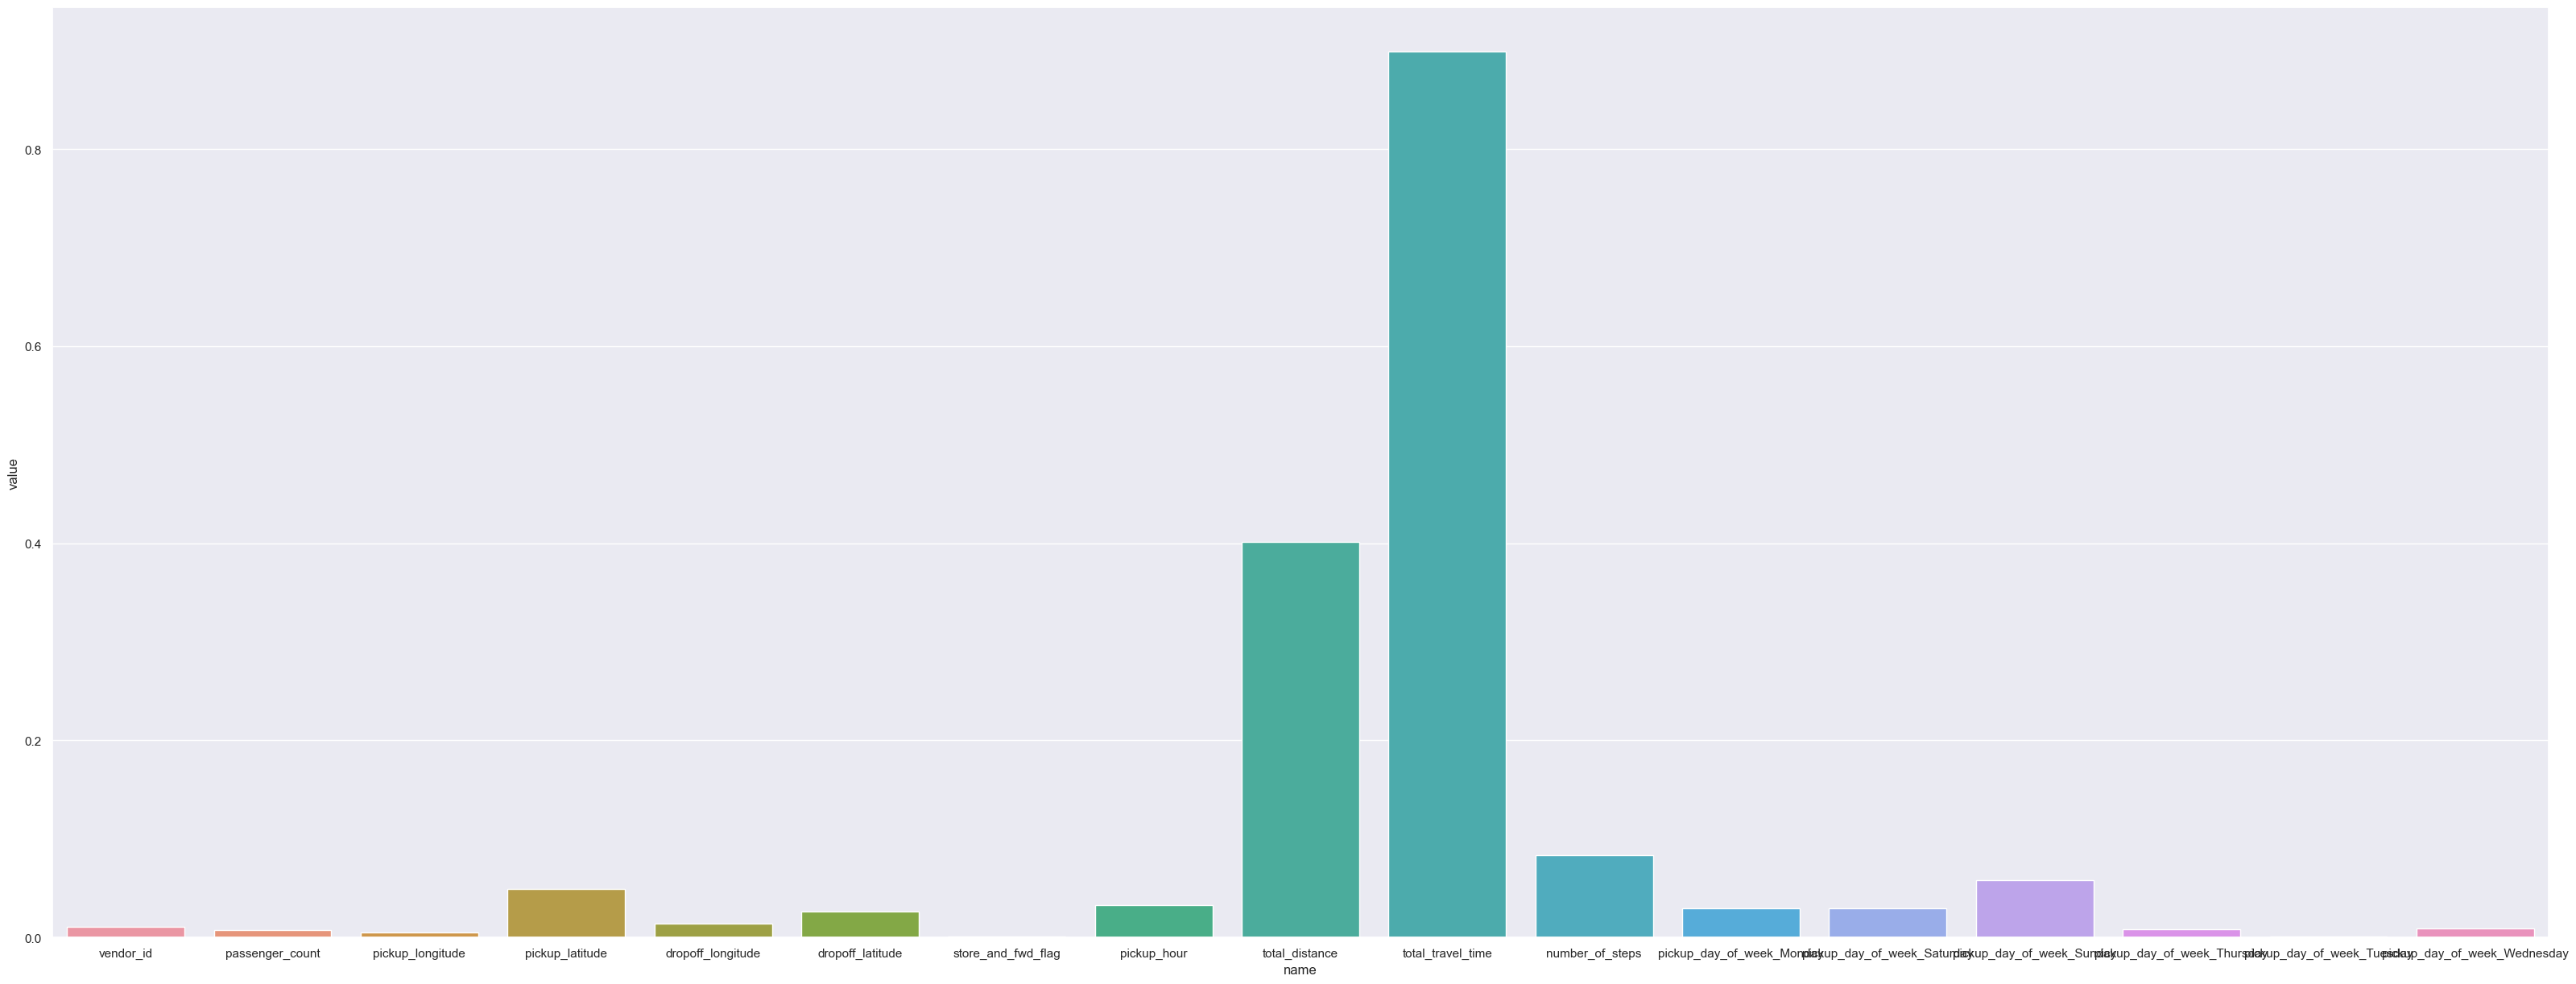

In [107]:
features_lin_reg = pd.DataFrame(np.column_stack([abs(lin_reg.coef_), X_train.columns]), 
                        columns = ['value', 'name'])
plt.figure(figsize=(40, 15))
sns.barplot(features_lin_reg, x = 'name', y = 'value')

### Задание 6.4. (1 балл)
Для лучшей из построенных моделей рассчитайте медианную абсолютную ошибку (MeAE - в sklearn функция median_absolute_error) предсказания длительности поездки такси на валидационной выборке:
$$ MeAE = median(|y_i-\hat{y_i}|)$$

Значение метрики MeAE переведите в минуты и округлите до десятых.


In [108]:
X_train, X_val, y_train, y_val =  model_selection.train_test_split(X_train, y_train, test_size=0.2, random_state=42)

X_val_scaled = scaler.transform(X_val)

In [109]:
meae = metrics.median_absolute_error(boosting.predict(X_val_scaled), y_val)

In [111]:
X_train, X_valid, y_train, y_valid = model_selection.train_test_split(X_train, y_train, test_size=0.2, random_state=42)

X_valid_scaled = scaler.transform(X_valid)
meae_second = metrics.median_absolute_error(np.exp(y_valid) - 1, np.exp(boosting.predict(X_valid_scaled)) - 1)
meae_minut = round(meae / 60, 1)
print(f'MeAE на валидационной выборке: {round(meae_second,6)} секунд')
print(f'MeAE на валидационной выборке: {meae_minut} минут')

MeAE на валидационной выборке: 111.20776 секунд
MeAE на валидационной выборке: 0.0 минут


### Задание 6.5. (2.5 балла)

Напишите развернутую интерпретацию полученных во всем задании результатов. Какая модель лучше? Какие признаки важны? Как вы думаете, почему?

In [112]:
RMSLE = np.array([np.sqrt(metrics.mean_squared_error(lin_reg.predict(X_test_scaled), y_test)), 
         np.sqrt(metrics.mean_squared_error(ridge.predict(X_test_scaled), y_test)),
        0.430119, 
        np.sqrt(metrics.mean_squared_error(rf.predict(X_test_scaled), y_test)),
        np.sqrt(metrics.mean_squared_error(boosting.predict(X_test_scaled), y_test))])
indexes_names = np.array(['Linear Regression', 
                          'Ridge Regression', 'Best Tree', 'Random Forest', 'Gradient Boosting'])

In [113]:
frame_fin = pd.DataFrame(np.column_stack([indexes_names, RMSLE]), columns = ['Model', 'RMSLE'])
frame_fin = frame_fin.set_index('Model')
frame_fin.sort_values(by = 'RMSLE')

,RMSLE
Model,
Gradient Boosting,0.3983441217294843
Random Forest,0.4160738687481532
Best Tree,0.430119
Linear Regression,0.5429884315512177
Ridge Regression,0.5429884517308278


In [102]:
features.sort_values(by = 'value', ascending = False).head(3) 

,value,name
8,0.645104,total_distance
9,0.1953,total_travel_time
7,0.058663,pickup_hour


`Наилучшая модель:` Градиентный бустинг имеет минимальное значение метрики RMSLE на валидационной и на тестовой выборках. Это не очень удивительно, вследствие того, что бустинг ансамблевый метод, корректирующий ошибки предыдущих моделей. Ансамблевые методы работают потенциально лучше, чем одиночные (линейная регрессия, регрессия с регуляризацией, дерево решений), поскольку в случае задачи регрессии усредняются предсказания, полученные по всем моделям в ансамбле. В случае с бустингом происходит также дополнительно корректировка моделей в процессе обучения. Ансамблевые методы с использованием деревьев решений внутри также работают лучше, чем линейная регрессия и ее разновидности, поскольку могут выявлять также нелинейные взаимосвязи. . \
* Линейная регрессия. Показывает небольшие значения ошибки, но большие по сравнению с другими моделями. Мы можем предположить, что линейная и Ridge регрессии не в полной мере улавливают нелинейные зависимости
* Оптимальным деревом оказалось с глубиной 11. Дерево склонно к переобучению, однако данная глубина оказалась оптимальной, на которой переобучение еще не началось. Дерево решений способно улавливать нелинейные взаимосвязи и следовательно показывает лучшие значения метрики.
* Случайный лес и градиентный бустинг показывают схожие результаты с разницей примерно в 0.02. В абсолютных значениях это не большая величина, но для соревнований по машинному обучению такая разница может оказываться существенной \
\
В среднем лучшая модель ошибается на 1.8 минут по метрике 𝑀𝑒𝐴𝐸, что говорит о том, что мы построили модель с хорошей предсказательной способностью.  
`Важность признаков:` Тремя наиболее важными признаками являются: `total_distance`, `total_travel_time`, `pickup_hour`. Первые два признака получены из OSRM-данных. Первый означает: кратчайшее дорожное расстояние (в метрах) из точки, в которой был включён счётчик, до точки, в которой счётчик был выключен. Второй же означает: наименьшее время поездки (в секундах) из точки, в которой был включён счётчик, до точки, в которой счётчик был выключен. Данные показатели автоматически рассчитываются и мы предполагаем, что большинство таксистов опираются на маршруты, построенные навигаторами или иными автоматическими алгоритмами. Следовательно, автоматически расчитанные показатели будут в наилучшей степени предсказывать реальную длительность поездки. Второй признак является менее важным, поскольку он может не учитывать особенности дорог и скорость движения на них. Важность признака `pickup_hour` обусловлена тем, что час дня, в который начата поездка может совпадать с временем большей или меньшей загруженности дорог, следовательно это влияет на длительность поездки. Другие важные признаки включают все местоположения начала и конца поездки(`pickup, dropoff`, `longitude, latitude`), а также `number_of_steps`(только у линейной регрессии). Про первую группу признаков можно сказать, что они отвечают за район, местоположение, в котором совершалась поездка и следовательно учитывают потенциально загруженность дорог географически. Вторая же переменная учитывает сложность дороги. Впрочем, стоит заметить, что первая тройка признаков по важности остается неизменной у трех моделей и мы можем предположить, что у остальных тоже. Остальные признаки не обладают большой важностью. 